In [166]:
import pandas as pd

#import homeless dataset and clean up data
df = pd.read_csv(f'../src/data/homeless_2022.csv', sep='\t')
df = df.rename(columns={"Name": 'state'})
df = df.rename(columns={"Avg. ValueToDisplay": 'homeless count'})
df["homeless count"] = df["homeless count"].str.replace(",","").astype(int)
df = df.drop(columns=[df.columns[3]])


#rename columns to match wealth datasets


print(df)


# print(df.head())
# print(list(list(df.columns)))


    Rank state  homeless count
0      1    CA          171521
1      2    NY           74178
2      3    FL           25959
3      4    WA           25211
4      5    TX           24432
5      6    OR           17959
6      7    MA           15507
7      8    AZ           13553
8      9    PA           12691
9     10    GA           10689
10    11    OH           10654
11    12    TN           10567
12    13    CO           10397
13    14    NC            9382
14    15    IL            9212
15    16    NJ            8752
16    17    MI            8206
17    18    MN            7917
18    19    NV            7618
19    20    LA            7373
20    21    VA            6529
21    22    MO            5992
22    23    HI            5967
23    24    IN            5449
24    25    MD            5349
25    26    WI            4775
26    27    ME            4411
27    28    DC            4410
28    29    KY            3984
29    30    OK            3754
30    31    AL            3752
31    32

In [167]:
#rename columns to match wealth datasets
abrev_to_state_mapping = { #from: https://medium.com/@jason_the_data_scientist/python-mapping-state-abbreviations-to-state-and-vice-versa-in-pandas-e4cd24edefb0
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'PR': 'Puerto Rico',
        'VI': 'Virigin Islands'
    }

df['state'].replace(abrev_to_state_mapping,inplace=True)
df = df.rename(columns={"homeless count": '#_of_people'})

print(df)

    Rank                 state  #_of_people
0      1            California       171521
1      2              New York        74178
2      3               Florida        25959
3      4            Washington        25211
4      5                 Texas        24432
5      6                Oregon        17959
6      7         Massachusetts        15507
7      8               Arizona        13553
8      9          Pennsylvania        12691
9     10               Georgia        10689
10    11                  Ohio        10654
11    12             Tennessee        10567
12    13              Colorado        10397
13    14        North Carolina         9382
14    15              Illinois         9212
15    16            New Jersey         8752
16    17              Michigan         8206
17    18             Minnesota         7917
18    19                Nevada         7618
19    20             Louisiana         7373
20    21              Virginia         6529
21    22              Missouri  

/var/folders/sj/qdkwd6_14flf3xyclp9wg1f00000gn/T/ipykernel_10111/4191362192.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state'].replace(abrev_to_state_mapping,inplace=True)


In [168]:
#Analysis - extract data from the corresponding year wealth dataset and analyze relevant statistics
from src.scripts.read_parse import read_csv_data, parse_data_remove_useless_cols
from src.scripts.analyze import parse_data_count_based_on_col, display_all_graphs

#important_cols = ['state']

#data = parse_data_remove_useless_cols(read_csv_data(2022))

#get # billionares per state
data = pd.read_csv(f'../src/data/billionaires_2022.csv')
data = parse_data_remove_useless_cols(data)
state_counts = parse_data_count_based_on_col(data, 'state')

print(state_counts)

#find billionare to homeless ratio
df = df.rename(columns={"#_of_people": 'homeless #'})
df = pd.merge(df,state_counts,on='state')
df = df.rename(columns={"#_of_people": 'billionares #'})
df['ratio'] = df['billionares #']/df['homeless #']*1000 #billionares per 1k homeless ratio
print(df)


         state  #_of_people
4   California          206
40    New York          142
8      Florida           92
58       Texas           75
18    Illinois           29
..         ...          ...
20        Iowa            1
22     Jiangxi            1
23       Jilin            1
27       Maine            1
0      Alabama            1

[67 rows x 2 columns]
    Rank           state  homeless #  billionares #      ratio
0      1      California      171521            206   1.201019
1      2        New York       74178            142   1.914314
2      3         Florida       25959             92   3.544050
3      4      Washington       25211             16   0.634644
4      5           Texas       24432             75   3.069745
5      6          Oregon       17959              3   0.167047
6      7   Massachusetts       15507             24   1.547688
7      8         Arizona       13553             14   1.032982
8      9    Pennsylvania       12691             20   1.575920
9     10   

    Rank           state  #_of_people  billionares #      ratio
0      1      California       171521            206   1.201019
1      2        New York        74178            142   1.914314
2      3         Florida        25959             92   3.544050
3      4      Washington        25211             16   0.634644
4      5           Texas        24432             75   3.069745
5      6          Oregon        17959              3   0.167047
6      7   Massachusetts        15507             24   1.547688
7      8         Arizona        13553             14   1.032982
8      9    Pennsylvania        12691             20   1.575920
9     10         Georgia        10689             20   1.871082
10    11            Ohio        10654              7   0.657030
11    12       Tennessee        10567             13   1.230245
12    13        Colorado        10397             12   1.154179
13    14  North Carolina         9382              6   0.639522
14    15        Illinois         9212   

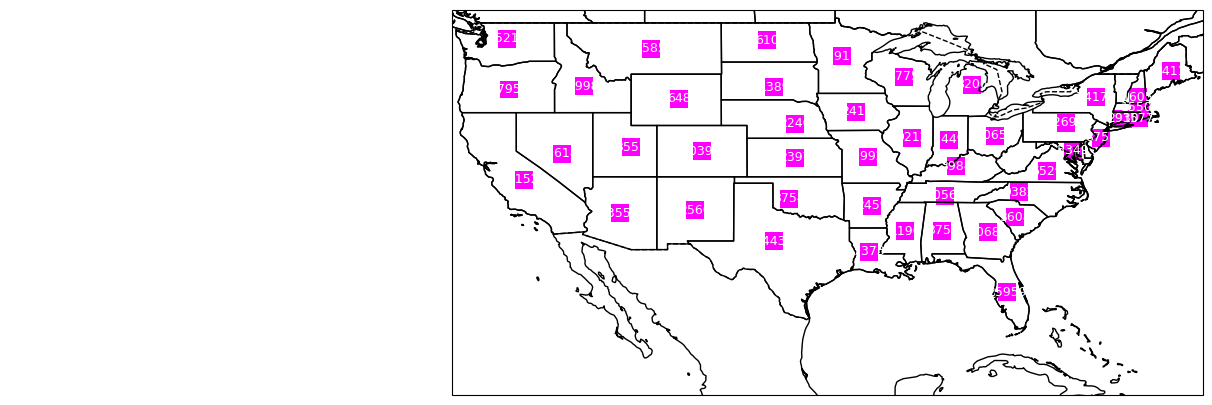

In [169]:
#Visualizations Experimentation

# neccessary to import modules from src
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.scripts.visualizations.scatter_usa import plot_usa_map_with_data
    

#issue - numbers cut off after two digits
df = df.rename(columns={'homeless #': '#_of_people'})
#df = df.rename(columns={'ratio': '#_of_people'})
print(df)
plot_usa_map_with_data(df)